# 1. Cargar las Librerías 📚

🚀 En esta sección, cargamos todas las librerías necesarias para el análisis y visualización de los vuelos y las rutas. ¡Es el primer paso hacia nuestro destino! 🛫


In [114]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import deque
from datetime import timedelta


# 2. Lectura del Archivo CSV 🗂️

📄 En esta parte, leemos el archivo CSV que contiene toda la información de los vuelos ✈️. Mostramos un resumen de los datos cargados para tener una idea de las opciones disponibles. ¡Comenzamos a planear el viaje! 🌍


In [115]:
# Opción 1: Mostrar todos los datos directamente con print
def leer_archivo(archivo_csv):
    vuelos = pd.read_csv(archivo_csv)
    vuelos['Fecha_Salida'] = pd.to_datetime(vuelos['Fecha_Salida'] + ' ' + vuelos['Hora_Salida_Origen'])
    vuelos['Fecha_Llegada'] = pd.to_datetime(vuelos['Fecha_Llegada'] + ' ' + vuelos['Hora_Llegada_Destino'])
    vuelos['Duracion'] = vuelos['Fecha_Llegada'] - vuelos['Fecha_Salida']
    
    # Mostrar todos los datos
    print("Datos completos de vuelos (DataFrame):")
    print(vuelos)  # Mostrar todos los datos del DataFrame
    
    return vuelos

# Cargar el archivo CSV
archivo_csv = 'ejemplosvuelos.csv'  # Cambia esto al nombre de tu archivo CSV
vuelos = leer_archivo(archivo_csv)


Datos completos de vuelos (DataFrame):
       ID   Origen     Destino        Fecha_Salida Hora_Salida_Origen  \
0   VU001   Madrid        CDMX 2024-09-24 08:15:00              08:15   
1   VU002  Toronto      Madrid 2024-09-19 13:02:00              13:02   
2   VU003   Sídney        CDMX 2024-09-18 06:45:00              06:45   
3   VU004     Roma       Tokio 2024-09-26 00:48:00              00:48   
4   VU005    París       Tokio 2024-09-25 10:06:00              10:06   
5   VU006  Londres       Tokio 2024-09-26 01:46:00              01:46   
6   VU007   Berlín      Madrid 2024-09-18 09:53:00              09:53   
7   VU008   Sídney  Nueva York 2024-09-23 02:02:00              02:02   
8   VU009   Madrid        Roma 2024-09-09 14:40:00              14:40   
9   VU010    Tokio      Madrid 2024-09-20 20:10:00              20:10   
10  VU011   Berlín       Tokio 2024-09-30 20:44:00              20:44   
11  VU012     CDMX       Tokio 2024-09-27 01:51:00              01:51   
12  VU013   

# 3. Creación del Grafo de Vuelos 🌐

🛫 En esta sección, generamos el **grafo dirigido** con las rutas de vuelos conectando las ciudades. Cada vuelo representa una conexión entre ciudades, formando un gran mapa de posibilidades 🌍✨.


In [116]:
# Función para crear un grafo dirigido a partir de los vuelos
def crear_grafo(vuelos):
    G = nx.DiGraph()  # Crear un grafo dirigido
    
    for idx, vuelo in vuelos.iterrows():
        origen = vuelo['Origen']
        destino = vuelo['Destino']
        tiempo = vuelo['Duracion'].total_seconds() / 3600  # Convertir duración a horas
        costo = vuelo['Precio_Vuelo']
        
        # Añadir arista con pesos de tiempo y costo
        G.add_edge(origen, destino, tiempo=tiempo, costo=costo)
    
    return G

# Crear el grafo de vuelos
G = crear_grafo(vuelos)


# 4. Visualización del Grafo de Vuelos 🎨

👀 Aquí visualizamos el **grafo de vuelos** con pesos basados en el tiempo de vuelo ⏱️ y el costo 💰. ¡Observa cómo las ciudades se conectan por aire a través de las rutas! 🗺️✈️


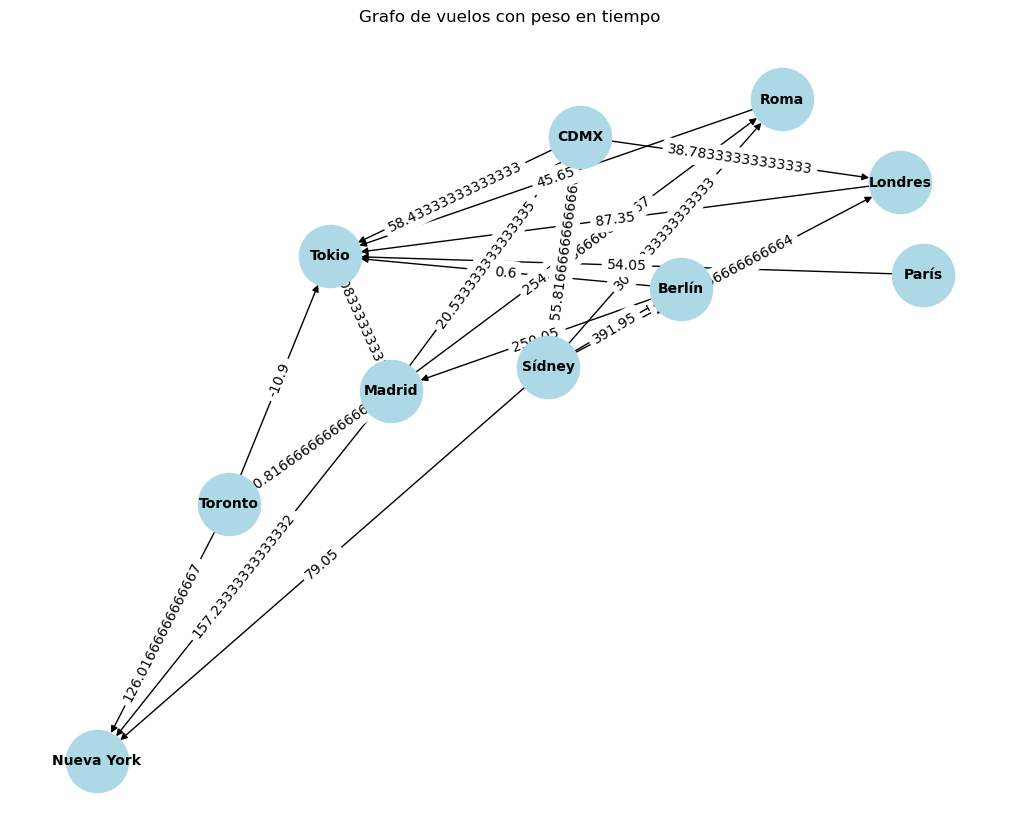

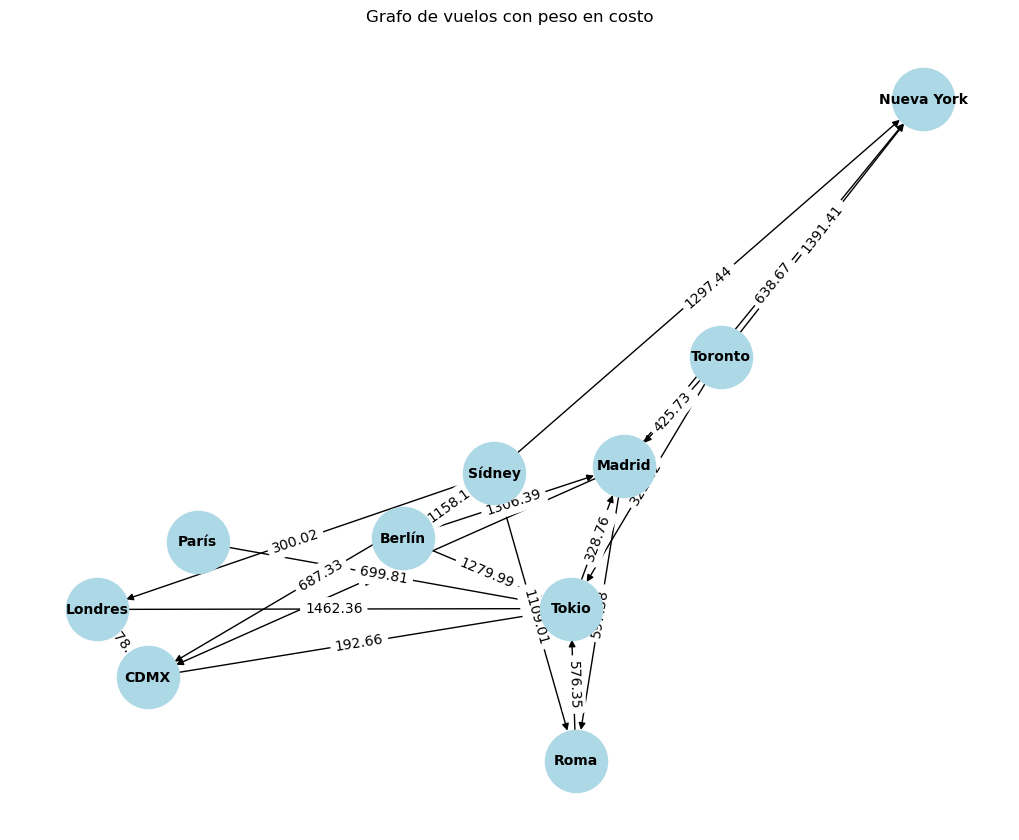

In [117]:
# Función para visualizar el grafo con pesos de tiempo o costo
def visualizar_grafo(G, peso='tiempo'):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Layout para la posición de los nodos
    
    labels = nx.get_edge_attributes(G, peso)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.title(f"Grafo de vuelos con peso en {peso}")
    plt.show()

# Visualizar el grafo con peso en tiempo
visualizar_grafo(G, peso='tiempo')

# Visualizar el grafo con peso en costo
visualizar_grafo(G, peso='costo')


# 5. Algoritmo de Búsqueda por Costo Uniforme ⏳💰

🔍 Implementamos la **búsqueda por costo uniforme** para encontrar la ruta más rápida ⏳ o la más económica 💸 entre dos ciudades. ¡Viajar nunca fue tan eficiente! 🛫🌍


In [118]:
def costo_uniforme(grafo, inicio, objetivo, tipo='tiempo'):
    """
    Algoritmo de búsqueda por costo uniforme.
    tipo: 'tiempo' o 'costo', determina qué peso usar para calcular la ruta más económica.
    """
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  # (costo, nodo actual, camino)
    visitados = set()
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            
            for vecino in grafo[nodo_actual]:
                nuevo_costo = costo_actual + grafo[nodo_actual][vecino][tipo]
                nuevo_camino = camino + [vecino]
                heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))
    return None, []  # Si no se encontró una ruta, devolvemos None en lugar de 'inf'

# Mostrar la mejor ruta en términos de tiempo
def mostrar_ruta_tiempo(grafo, inicio, destino):
    costo_tiempo, camino_tiempo = costo_uniforme(grafo, inicio, destino, tipo='tiempo')
    if camino_tiempo:
        print(f"Para ir de {inicio} a {destino}, la mejor opción en términos de tiempo es:")
        for i in range(len(camino_tiempo)-1):
            print(f"- Vuelo de {camino_tiempo[i]} a {camino_tiempo[i+1]}")
        print(f"Te tomará un total de {costo_tiempo:.2f} horas esta ruta.")
    else:
        print(f"No se encontró una ruta válida en términos de tiempo entre {inicio} y {destino}.")

# Mostrar la mejor ruta en términos de costo
def mostrar_ruta_costo(grafo, inicio, destino):
    costo_dinero, camino_dinero = costo_uniforme(grafo, inicio, destino, tipo='costo')
    if camino_dinero:
        print(f"Para ir de {inicio} a {destino}, la mejor opción en términos de costo es:")
        for i in range(len(camino_dinero)-1):
            precio = grafo[camino_dinero[i]][camino_dinero[i+1]]['costo']
            print(f"- Vuelo de {camino_dinero[i]} a {camino_dinero[i+1]} (${precio:.2f})")
        print(f"Te costará un total de ${costo_dinero:.2f} tomar esta ruta.")
    else:
        print(f"No se encontró una ruta válida en términos de costo entre {inicio} y {destino}.")


# 6. Algoritmos de Búsqueda en Amplitud (BFS) y Profundidad (DFS) 🔄🌐

🧭 En esta parte, exploramos todas las rutas posibles entre dos ciudades 🛬, ya sea buscando en **amplitud** (BFS) 🔍 o en **profundidad** (DFS) 🧑‍🚀. ¡Elige tu camino ideal para viajar! ✈️


In [119]:
# Búsqueda en amplitud (BFS)
def busqueda_amplitud(grafo, inicio, objetivo):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    caminos = []
    while cola:
        nodo_actual, camino = cola.popleft()
        if nodo_actual == objetivo:
            caminos.append(camino)
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    cola.append((vecino, nueva_ruta))
    return caminos if caminos else None

# Búsqueda en profundidad (DFS)
def dfs(grafo, inicio, objetivo, visitados=None, camino=None, caminos_encontrados=None):
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []
    
    camino.append(inicio)
    visitados.add(inicio)
    
    if inicio == objetivo:
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, visitados, camino, caminos_encontrados)
    
    camino.pop()  # Retroceder al nodo anterior
    visitados.remove(inicio)
    
    return caminos_encontrados if caminos_encontrados else None

# Mostrar todas las rutas posibles usando BFS
def mostrar_rutas_bfs(grafo, inicio, destino):
    rutas_bfs = busqueda_amplitud(grafo, inicio, destino)
    if rutas_bfs:
        print(f"Todas las rutas posibles entre {inicio} y {destino} usando BFS son:")
        for idx, ruta in enumerate(rutas_bfs, 1):
            print(f"{idx}) {' -> '.join(ruta)}")
    else:
        print(f"No se encontraron rutas válidas entre {inicio} y {destino} usando BFS.")

# Mostrar todas las rutas posibles usando DFS
def mostrar_rutas_dfs(grafo, inicio, destino):
    rutas_dfs = dfs(grafo, inicio, destino)
    if rutas_dfs:
        print(f"Todas las rutas posibles entre {inicio} y {destino} usando DFS son:")
        for idx, ruta in enumerate(rutas_dfs, 1):
            print(f"{idx}) {' -> '.join(ruta)}")
    else:
        print(f"No se encontraron rutas válidas entre {inicio} y {destino} usando DFS.")

# 7. Nodos y Rutas Accesibles desde una Ciudad 🗺️
🌍 ¿A dónde puedes volar desde tu ciudad? Aquí mostramos las **rutas accesibles** 🛫, ya sea directas 🛬 o con escalas 🔄. ¡Planea tu próxima aventura! ✨🗺️


In [120]:
# Nodos accesibles directamente
def nodos_accesibles(grafo, origen):
    if origen in grafo:
        destinos = list(grafo[origen].keys())
        return destinos if destinos else None
    else:
        return None

# Ciudades accesibles desde 'CDMX'
destinos = nodos_accesibles(G, 'CDMX')
if destinos:
    print(f"Desde CDMX puedes volar directamente a: {', '.join(destinos)}")
else:
    print("No se encontraron vuelos directos desde CDMX.")

# Rutas accesibles directas o indirectas
def rutas_posibles(grafo, origen):
    visitados = set()
    cola = deque([origen])
    rutas = []
    while cola:
        nodo_actual = cola.popleft()
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            rutas.append(nodo_actual)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    cola.append(vecino)
    return rutas if rutas else None

# Mostrar todas las ciudades accesibles desde 'CDMX'
rutas_accesibles = rutas_posibles(G, 'CDMX')
if rutas_accesibles:
    print(f"Desde CDMX puedes volar directa o indirectamente a: {', '.join(rutas_accesibles)}")
else:
    print("No se encontraron rutas accesibles desde CDMX.")

Desde CDMX puedes volar directamente a: Tokio, Londres
Desde CDMX puedes volar directa o indirectamente a: CDMX, Tokio, Londres, Madrid, Roma, Nueva York


# 8. Mostrar los Resultados Finales
🛫 Finalmente, mostramos las rutas más óptimas, tanto en tiempo como en costo, así como todas las rutas posibles usando BFS y DFS. 🧳✈️ ¡Listo para planear tu viaje!


In [121]:
# Definir el origen y destino para las búsquedas
inicio = 'CDMX'
destino = 'Madrid'

# Mostrar las rutas óptimas y todas las posibles
mostrar_ruta_tiempo(G, inicio, destino)
print("\n")
mostrar_ruta_costo(G, inicio, destino)
print("\n")
mostrar_rutas_bfs(G, inicio, destino)
print("\n")
mostrar_rutas_dfs(G, inicio, destino)


Para ir de CDMX a Madrid, la mejor opción en términos de tiempo es:
- Vuelo de CDMX a Tokio
- Vuelo de Tokio a Madrid
Te tomará un total de 253.52 horas esta ruta.


Para ir de CDMX a Madrid, la mejor opción en términos de costo es:
- Vuelo de CDMX a Tokio ($192.66)
- Vuelo de Tokio a Madrid ($328.76)
Te costará un total de $521.42 tomar esta ruta.


Todas las rutas posibles entre CDMX y Madrid usando BFS son:
1) CDMX -> Tokio -> Madrid


Todas las rutas posibles entre CDMX y Madrid usando DFS son:
1) CDMX -> Tokio -> Madrid
2) CDMX -> Londres -> Tokio -> Madrid
